In [1]:
############# Plotting cell
%matplotlib inline

import matplotlib.pylab as plt



# We are going to investigate the need for more/less iteration during training

This investigation was lead on the FCN16 architecture.

We will investigate this in two steps. 
- First by looking at the loss function and accuracy function over training.
- Followed by randomly picking images to see the effect on real data


All the path and net loading we need:

In [2]:
import sys
sys.path.append('/home/naylor/Documents/Python/PhD/PhD_Fabien/')
import os
import caffe
import numpy as np
import glob
import random
from skimage.io import imread as ir

caffe.set_mode_gpu()
number_images = 5

root_directory = "/home/naylor/Documents/Python/PhD/dataFCN/FCN16/"
input_images = "/home/naylor/Documents/Python/PhD/dataFCN/RGB/"

snapshot_directory = os.path.join(root_directory, "snapshot")
final_weight = os.path.join(root_directory, "temp_files", "weights.pretrained.caffemodel")
model_def = os.path.join(root_directory, "deploy.prototxt")

loss_file = os.path.join(root_directory, "loss.npy")
acc_file = os.path.join(root_directory, "acc.npy")

weights_files = glob.glob( os.path.join(snapshot_directory, "snapshot_iter_*.caffemodel") )
image_files = glob.glob( os.path.join(input_images, "*.png") )
random.shuffle(image_files)
test_images = image_files[0:number_images]

/home/naylor/Python_pkg/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/naylor/Python_pkg/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/naylor/Python_pkg/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


## Plotting the loss function 

number of values on top of 200000: 10


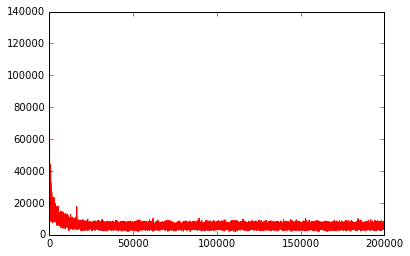

In [3]:
acc =  np.load(acc_file)
loss = np.load(loss_file)

print "number of values on top of 200000: {}".format(sum(loss > 200000))
loss[loss > 200000] = 100000
### thin out the loss function as it is highly variable

space = 10
new_loss = np.zeros(len(loss)/space)
new_acc = np.zeros(len(acc)/space)
for i in range(len(new_loss)):
    new_loss[i] = np.mean(loss[i*space:(i+1)*space])
    new_acc[i] = np.mean(acc[i*space:(i+1)*space])


iterations = range(0,len(loss), space)

plt.plot(iterations, new_loss, "-r")
plt.show()

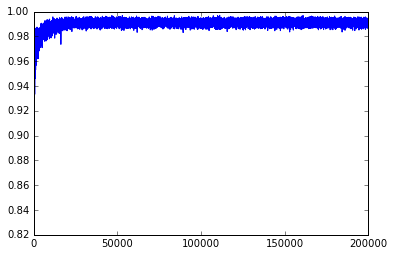

In [4]:
plt.plot(iterations, new_acc, "-b")
plt.show()

From these two graphs we can say that 50000 iterations seems way enough.

# Lets randomly pick 5 images for the folder file

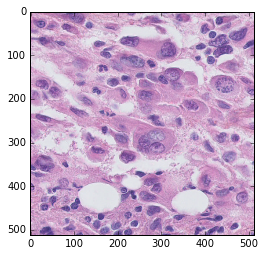

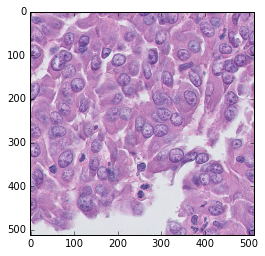

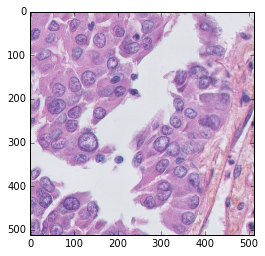

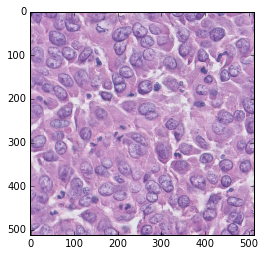

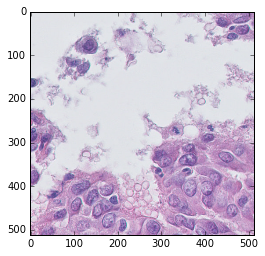

In [5]:
for image in test_images:
    img = ir(image)
    plt.figure()
    plt.imshow(img)

# Lets now setup the net given a weight file and images

In [6]:
## as caffe works with blobs...

x, y, z = img.shape
image_array = np.zeros(shape=(len(test_images), x, y, z-1)) ## they have 4 dimensions
i = 0
for image in test_images:
    image_array[i,:,:,:] = ir(image)[:,:,0:3]
    i += 1

In [7]:
from CheckingSolvingState.OutputNet import Transformer, GetScoreVectors

def Net(weights, data_batch_size):
    net = caffe.Net(model_def,      # defines the structure of the model
                    weights,  # contains the trained weights
                    caffe.TEST) 
    net.blobs['data'].reshape(data_batch_size, 3, 512, 512)
    return net


In [ ]:
net = Net(weights_files[-1], number_images)
transformer = Transformer(net)
score = GetScoreVectors(net, image_array, transformer, "score")

In [10]:
score

array([[[[-105885.7109375 , -109421.9609375 , -112987.890625  , ...,
          -249216.875     , -242355.28125   , -235146.328125  ],
         [-110504.140625  , -114572.234375  , -118588.8203125 , ...,
          -258941.96875   , -251627.1875    , -244299.5625    ],
         [-115039.8984375 , -119710.0703125 , -124219.84375   , ...,
          -268559.3125    , -260963.09375   , -252987.1875    ],
         ..., 
         [-113887.4375    , -116782.1328125 , -119594.046875  , ...,
          -250923.625     , -251618.234375  , -251991.21875   ],
         [-112399.6484375 , -115409.8828125 , -118429.9609375 , ...,
          -249921.015625  , -250935.53125   , -251968.125     ],
         [-110936.015625  , -114103.234375  , -117337.1875    , ...,
          -248927.15625   , -250627.03125   , -251680.234375  ]],

        [[-108604.34375   , -112521.0625    , -116408.0703125 , ...,
          -258122.984375  , -250699.890625  , -243624.015625  ],
         [-113545.5078125 , -117895.53125   ,